<a href="https://colab.research.google.com/github/sedavasema/one-shot-learning/blob/main/FaceRecognition_saeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ابتدا کد برای اجرا در کلب

In [1]:
!mkdir mydataset

In [2]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/1.jpg -P mydataset
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/2.jpg -P mydataset
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/3.jpg -P mydataset
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/4.jpg -P mydataset
#!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/5.jpg -P mydataset


--2023-06-30 17:20:52--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31313 (31K) [image/jpeg]
Saving to: ‘mydataset/1.jpg’

1.jpg               100%[===================>]  30.58K  --.-KB/s    in 0.005s  

2023-06-30 17:20:53 (5.70 MB/s) - ‘mydataset/1.jpg’ saved [31313/31313]

--2023-06-30 17:20:53--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33266 (32K) [

In [3]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_vggface
!pip install keras_applications

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-vgyqo2ix
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-vgyqo2ix
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8298 sha256=ed6e5c79b1c22f08624f1b6fe6d9f1d23dd6d928bfff293c89d96011ba011e65
  Stored in directory: /tmp/pip-ephem-wheel-cache-jn1490jg/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


# انتها کد برای اجرا در کلب

In [4]:
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
%matplotlib inline
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [5]:
# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

58909280/58909280 [==============================] - 1s 0us/step


In [6]:
model=vgg_features

In [7]:
model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

# تست درست لود شدن داده ها در محیط کولب

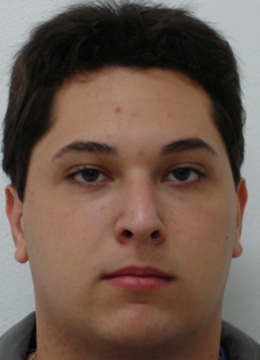

In [9]:
from google.colab.patches import cv2_imshow
img=cv2.imread("./mydataset/1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #RGB but OpenCV read BGR
cv2_imshow(img)

In [10]:
def preprocess_face(img, target_size=(224,224)):
    img = cv2.imread(img)
    img = cv2.resize(img, target_size)
    img_pixels = image.img_to_array(img)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255 #normalize input in [0, 1]
    return img_pixels

In [11]:
def img_to_encoding(path):
    img = preprocess_face(path)
    return model.predict(img)[0]

In [12]:
database = {}

database["user1"] = img_to_encoding("./mydataset/1.jpg")
database["user2"] = img_to_encoding("./mydataset/2.jpg")
database["user3"] = img_to_encoding("./mydataset/3.jpg")
database["user4"] = img_to_encoding("./mydataset/4.jpg")

1/1 [==============================] - 1s 574ms/step


# تست کلید های ساخته شده در دیتاست

In [14]:
database.keys()

dict_keys(['user1', 'user2', 'user3', 'user4'])

In [15]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [16]:
verification_threshhold = 0.547

In [17]:
def verify(image_path, identity, database):
    # Step 1: Compute the encoding for the image. Use img_to_encoding()
    encoding = img_to_encoding(image_path)

    # Step 2: Compute distance with identity's image
    dist = EuclideanDistance(encoding, database[identity])

    # Step 3: Open the door if dist < verification_threshhold, else don't open
    if dist < verification_threshhold:
        print("It's " + str(identity) + ", welcome!")
    else:
        print("It's not " + str(identity) + ", please go away")

    return dist

اگر یک یوزر را با خودش مقایسه کنیم میبینیم که هیچ اختلافی با هم ندارند

In [19]:
verify("mydataset/1.jpg", "user1", database)

1/1 [==============================] - 1s 572ms/step
It's user1, welcome!


0.0